In [507]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from numpy import set_printoptions
np.set_printoptions(suppress=True)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, log_loss, precision_score, recall_score,f1_score, precision_recall_curve,
classification_report, roc_curve)
from sklearn.preprocessing import StandardScaler

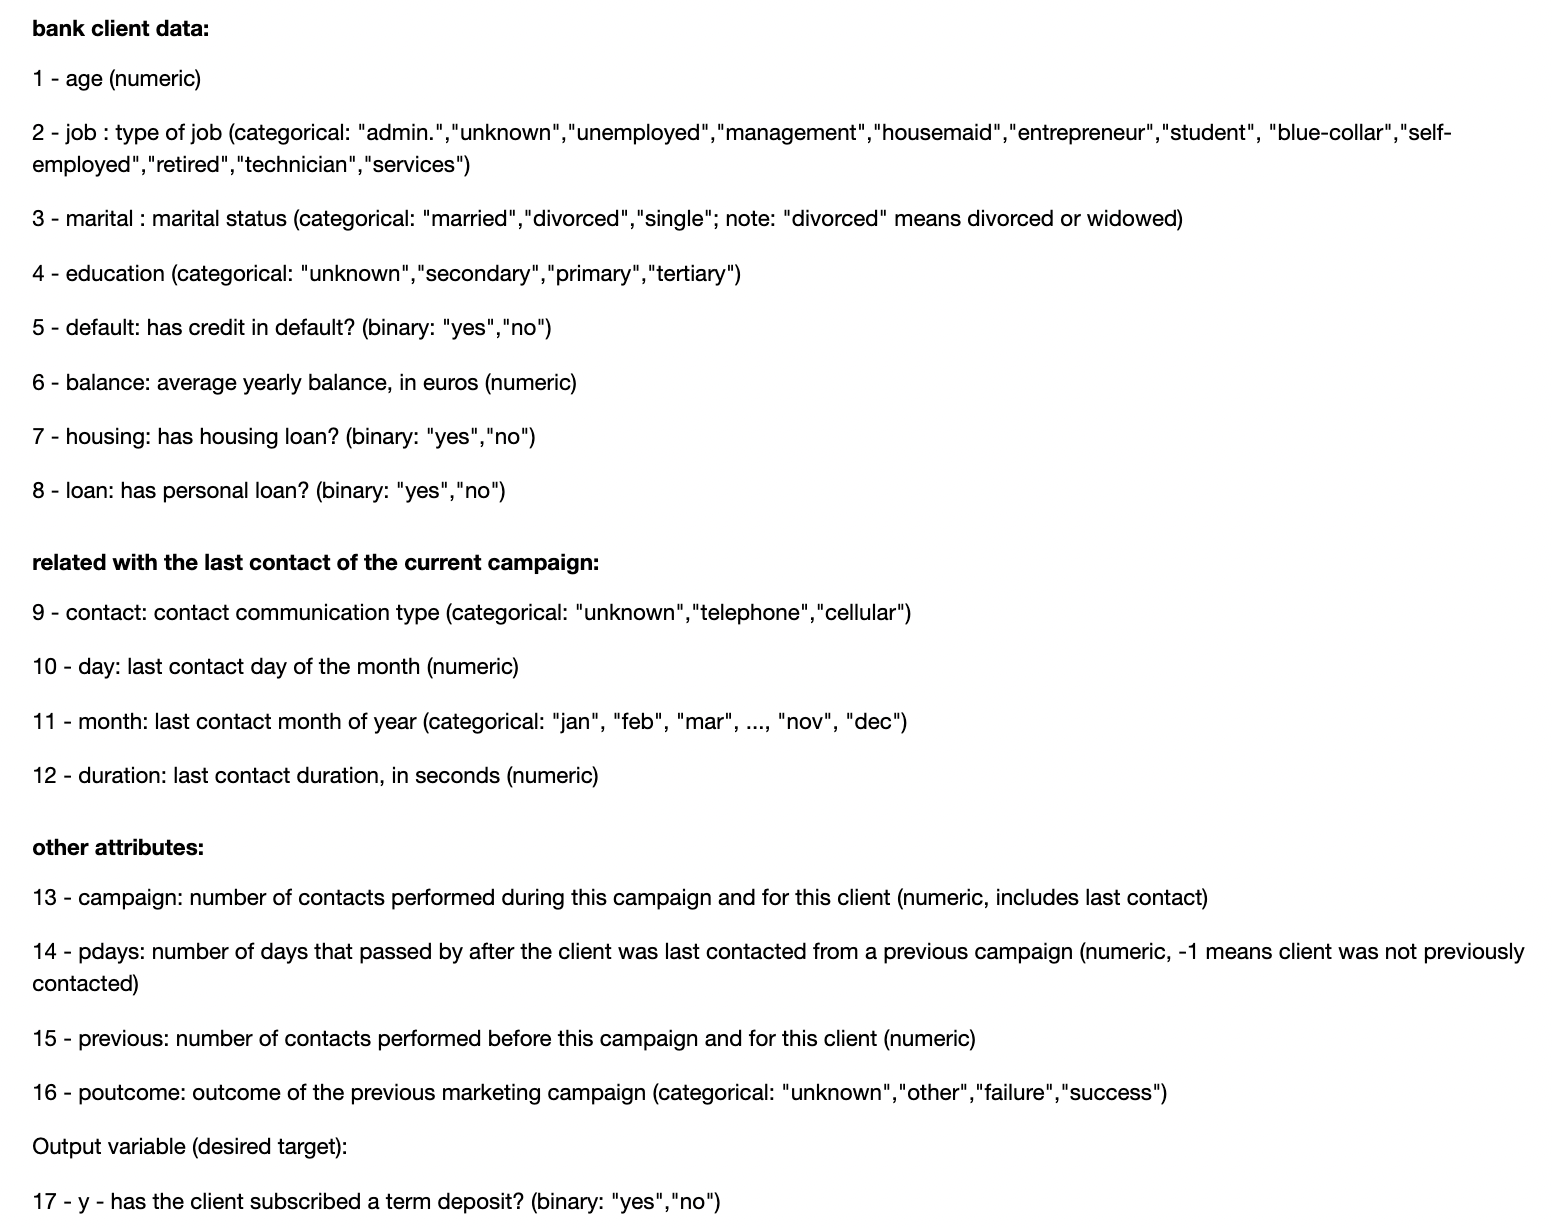

In [508]:
df=pd.read_csv('bank_labeled.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,4,1,999,0,3,0
1,44,9,2,1,0,29,1,0,2,5,4,1,999,0,3,0
2,33,2,1,1,0,2,1,1,2,5,4,1,999,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,4,1,999,0,3,0
4,33,11,2,3,0,1,0,0,2,5,4,1,999,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,10,3,999,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,10,2,999,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,10,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,10,4,999,0,3,0


In [581]:
# plt.figure(dpi=300)
# sns.pairplot(df, hue='y')

In [515]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.144655,2.763841,857.565283,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,2.408034,3.098021,303.245691,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,4.000000,1.000000,999.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,5.000000,2.000000,999.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,7.000000,3.000000,999.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,63.000000,999.000000,275.000000,3.000000,1.000000


In [517]:
df.groupby(['y'])['balance'].mean()

y
0    1303.714969
1    1804.267915
Name: balance, dtype: float64

In [582]:
# df['campaign'].value_counts()

In [524]:
df.groupby(['y'])['campaign'].mean()

y
0    2.846350
1    2.141047
Name: campaign, dtype: float64

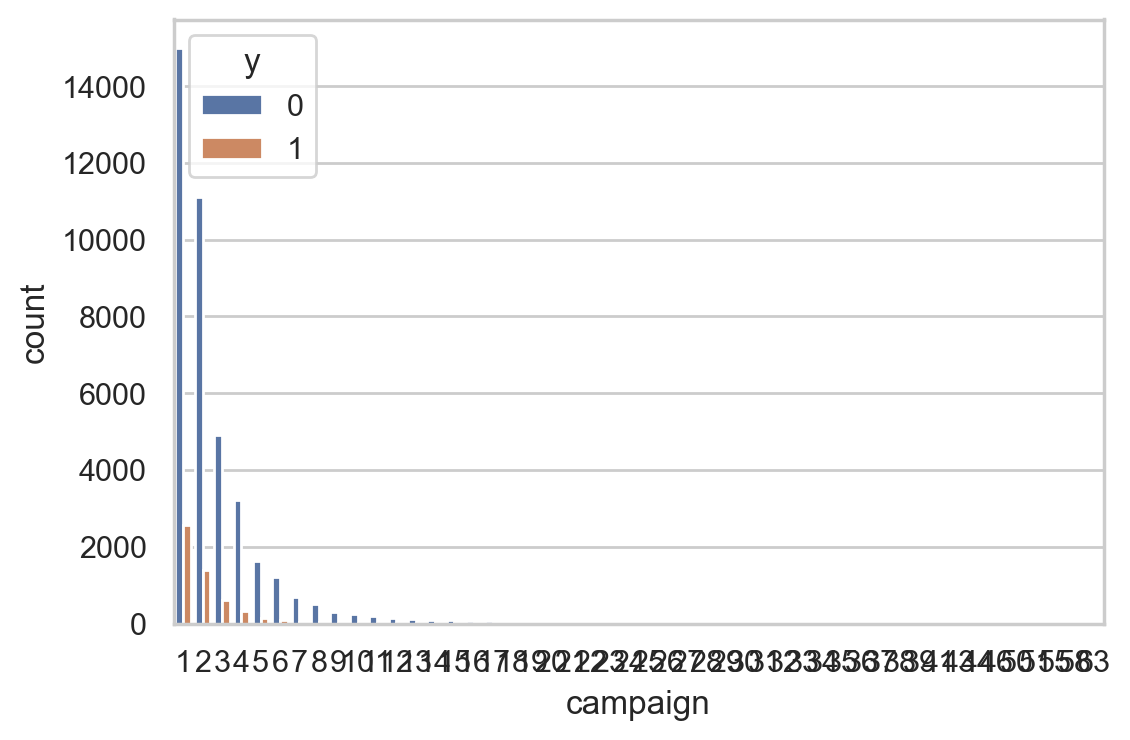

In [521]:
plt.figure(dpi=200)
sns.set_style('whitegrid')
sns.countplot(x='campaign',hue='y',data=df);

In [583]:
# plt.figure(dpi=200)
# sns.set_style('whitegrid')
# sns.countplot(x='y',hue='campaign',data=df);

In [365]:
cate=pd.read_csv('cate.csv')
cate                            # this is to illstrate how categorical features are coded. 
                                # each index number represent a class

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,admin,divorced,primary,no,no,no,cellular,jan,failure,no
1,blue_collar,married,secondary,yes,yes,yes,telephone,feb,other,yes
2,entrepreneur,single,tertiary,NaN,NaN,NaN,unknown,mar,success,NaN
3,housemaid,NaN,unknown,NaN,NaN,NaN,NaN,apr,unknown,NaN
4,management,NaN,NaN,NaN,NaN,NaN,NaN,may,NaN,NaN
5,retired,NaN,NaN,NaN,NaN,NaN,NaN,jun,NaN,NaN
6,self_employed,NaN,NaN,NaN,NaN,NaN,NaN,jul,NaN,NaN
7,services,NaN,NaN,NaN,NaN,NaN,NaN,aug,NaN,NaN
8,student,NaN,NaN,NaN,NaN,NaN,NaN,sep,NaN,NaN
9,technician,NaN,NaN,NaN,NaN,NaN,NaN,oct,NaN,NaN


In [366]:
X=df.drop(columns='y')
y=df['y']

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)

In [433]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)
# print(f'accuracy score on trainin data: {randomforest.score(X_train, y_train):.4f}')
y_pred=randomforest.predict(X_test)
# print(f'accuracy score on test data: {randomforest.score(X_test, y_test):.4f}')

In [434]:
precision_score(y_test, y_pred,pos_label=1)

0.6856287425149701

In [435]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7847,  105],
       [ 862,  229]])

In [436]:
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
cnf_matrix_percent

array([[0.98679577, 0.01320423],
       [0.79010082, 0.20989918]])

In [437]:
acc = cross_val_score(randomforest, X_train, y_train, cv=5, scoring='accuracy')
pre = cross_val_score(randomforest, X_train, y_train, cv=5, scoring='precision')
recall = cross_val_score(randomforest, X_train, y_train, cv=5, scoring='recall')
f1 = cross_val_score(randomforest, X_train, y_train, cv=5, scoring='f1')
# print all 5 times scores 
print(f'accuracy scores:  {acc}')
print(f'Precision scores: {pre}')
print(f'Recall scores:    {recall}')
print(f'F1 scores:        {f1}')
print('--------------------------------------')
# average the scores to get a more accurate score
print(f'Accuracy after 5 Folds:  {acc.mean()}')
print(f'Precision after 5 Folds: {pre.mean()}')
print(f'Recall after 5 Folds:    {recall.mean()}')
print(f'F1 after 5 Folds:        {f1.mean()}')    

accuracy scores:  [0.89300525 0.89908764 0.89383467 0.89354348 0.89395825]
Precision scores: [0.62406015 0.69784173 0.62       0.6374502  0.63636364]
Recall scores:    [0.19761905 0.23095238 0.22142857 0.19070322 0.20023838]
F1 scores:        [0.30018083 0.3470483  0.32631579 0.29357798 0.30462375]
--------------------------------------
Accuracy after 5 Folds:  0.8946858584940058
Precision after 5 Folds: 0.6431431425122937
Recall after 5 Folds:    0.20818831942789034
F1 after 5 Folds:        0.3143493313775906


In [438]:
print(randomforest.predict_proba(X_test)[:,1][:20])

[0.02 0.05 0.12 0.14 0.01 0.09 0.38 0.31 0.25 0.06 0.38 0.03 0.   0.13
 0.12 0.69 0.08 0.1  0.07 0.22]


In [440]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.69      0.21      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.60      0.63      9043
weighted avg       0.88      0.89      0.87      9043



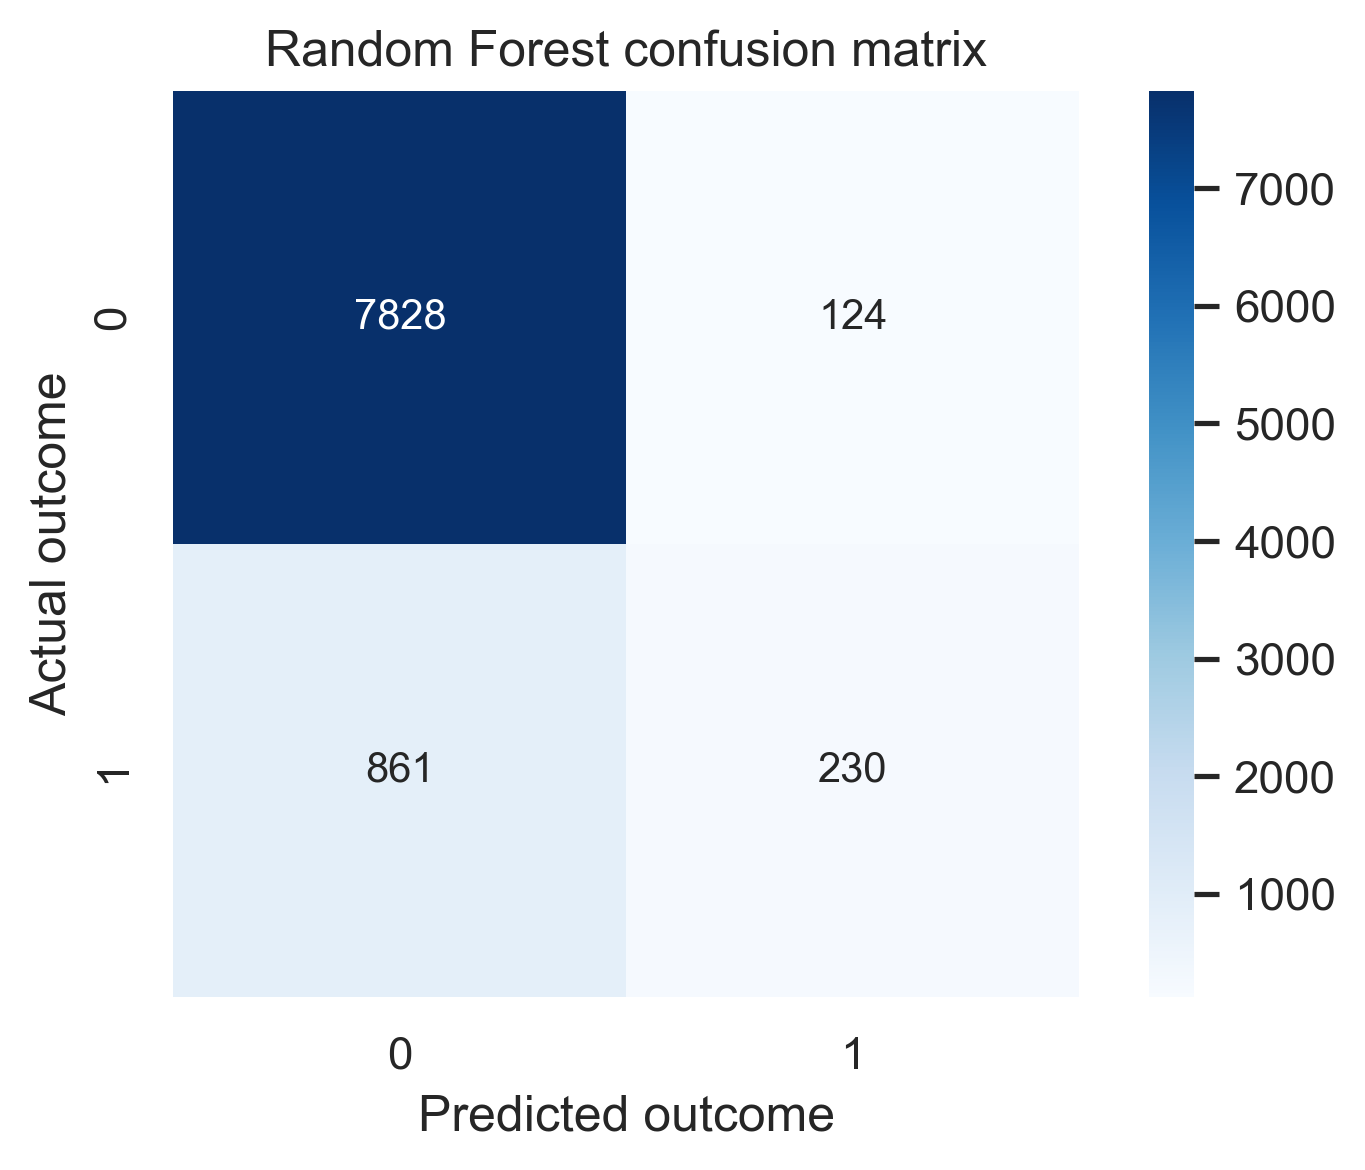

In [300]:
tree_matrix=confusion_matrix(y_test, randomforest.predict(X_test))
plt.figure(dpi=300)
sns.heatmap(tree_matrix, cmap=plt.cm.Blues,
annot=True, square=True,fmt='g')
plt.xlabel('Predicted outcome')                       
plt.ylabel('Actual outcome') 
plt.title('Random Forest confusion matrix');

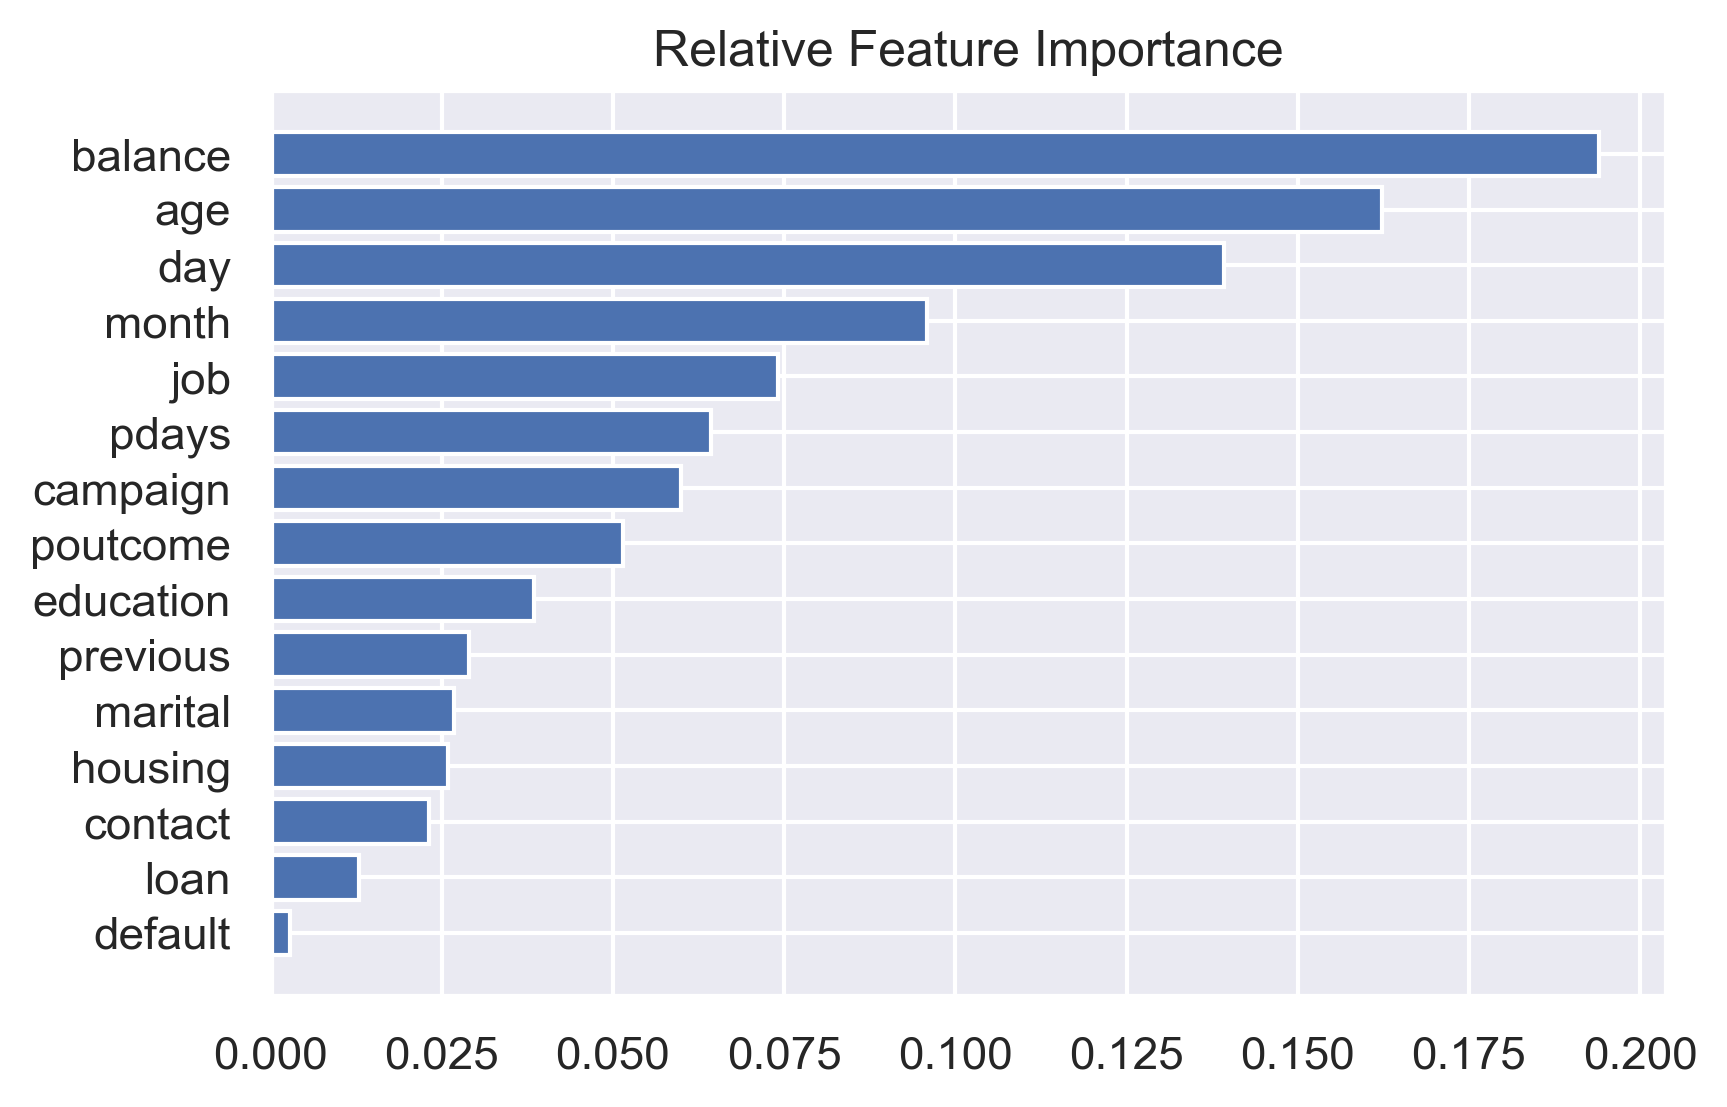

In [505]:
plt.figure(dpi=300)
sorted_idx=randomforest.feature_importances_.argsort()[:]
plt.barh(X_train.columns[sorted_idx], randomforest.feature_importances_[sorted_idx])
plt.title('Relative Feature Importance')
plt.savefig('feature_importances_',bbox_inches="tight",dpi=300)

# HyperParameter tuning of RF model

In [442]:
#check the default parameters
randomforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [445]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [448]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  27.9s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  30.9s


/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   8.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  22.6s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  29.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  21.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  22.5s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  19.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  21.5s
[CV] END bootstrap=False, max_depth=30

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  54.5s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  43.7s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  26.7s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  43.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  31.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  28.2s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  17.0s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  37.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  19.7s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=  53.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  20.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  16.6s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  14.6s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  40.5s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=  30.7s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  30.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  20.5s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=  35.8s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  46.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  23.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  14.7s
[CV] END bootstrap=True, max_dep

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [450]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [459]:
y_pred=rf_random.predict(X_test)
print(classification_report(y_test,y_pred))

## Increase precision score by 0.02%

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.71      0.19      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.81      0.59      0.62      9043
weighted avg       0.88      0.89      0.87      9043



In [ ]:
rf_ = RandomForestClassifier(n_estimators= 1600,
 min_samples_split=10,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth=20,
 bootstrap=True, random_state=42)

rf_random.fit(X_train, y_train)

y_pred=rf_.predict(X_test)
print(classification_report(y_test,y_pred))

# Handle Class Imbalance with optimized RF

## threshold adjustment

/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classifica

Random forest Model best F1 score 0.469 at prob decision threshold >= 0.240
Random forest Model best Precision score 1.000 at prob decision threshold >= 0.822


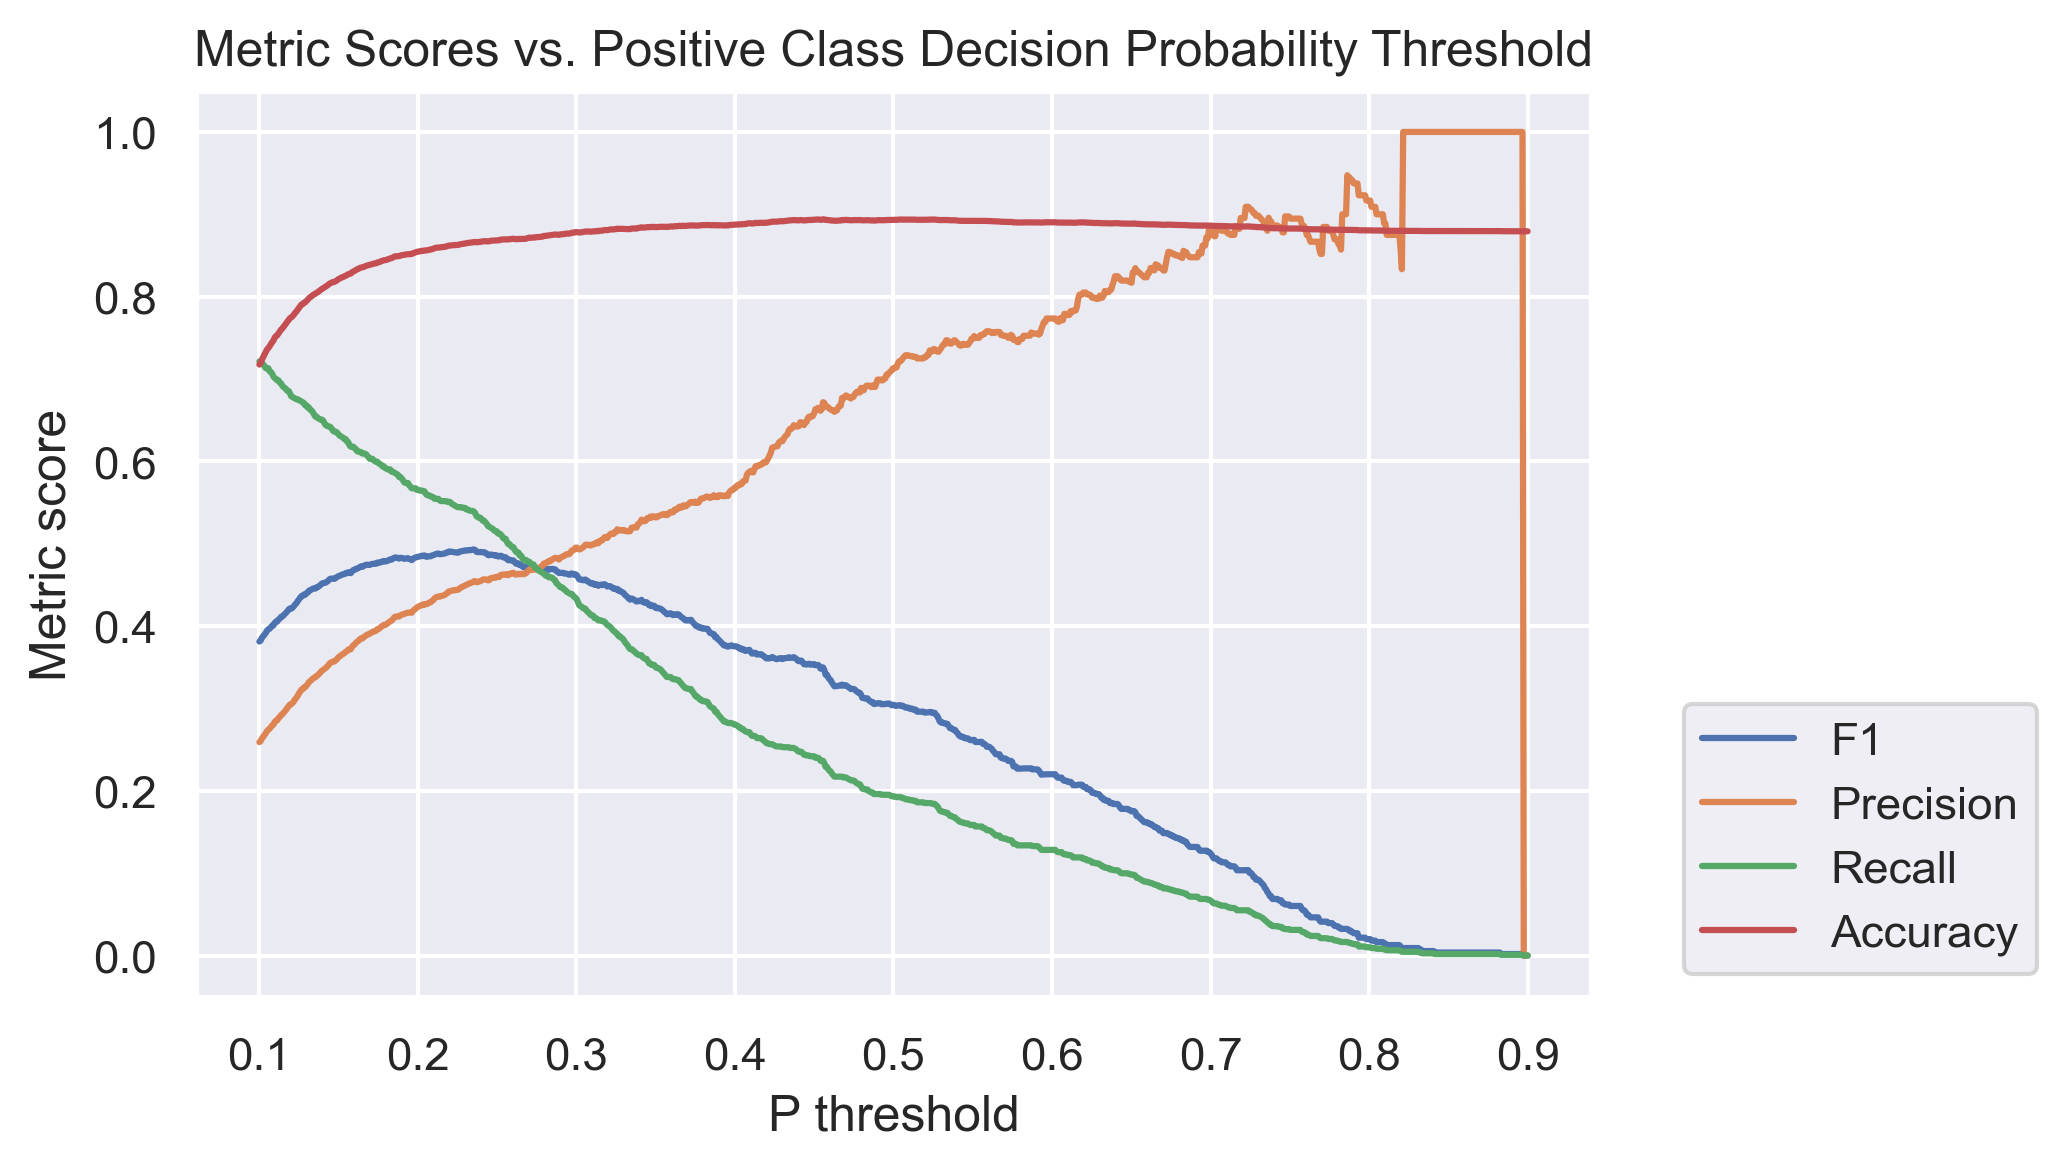

In [514]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

sns.set()

X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.90,1000)
model_val_probs = rf_random.predict_proba(X_val)[:,1] # positive class probs

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels,pos_label=1))    
    prec_scores.append(precision_score(y_val, model_val_labels,pos_label=1))
    rec_scores.append(recall_score(y_val, model_val_labels,pos_label=1))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(dpi=300)
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')
fig.tight_layout()
# best_f1_score = np.max(f1_scores) 
# best_thresh_p = thresh_ps[np.argmax(f1_scores)]

best_precision_score=np.max(prec_scores)
best_p = thresh_ps[np.argmax(prec_scores)]

print('Random forest Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

print('Random forest Model best Precision score %.3f at prob decision threshold >= %.3f' 
      % (best_precision_score, best_p))
plt.savefig('precision controlling',dpi=300) 

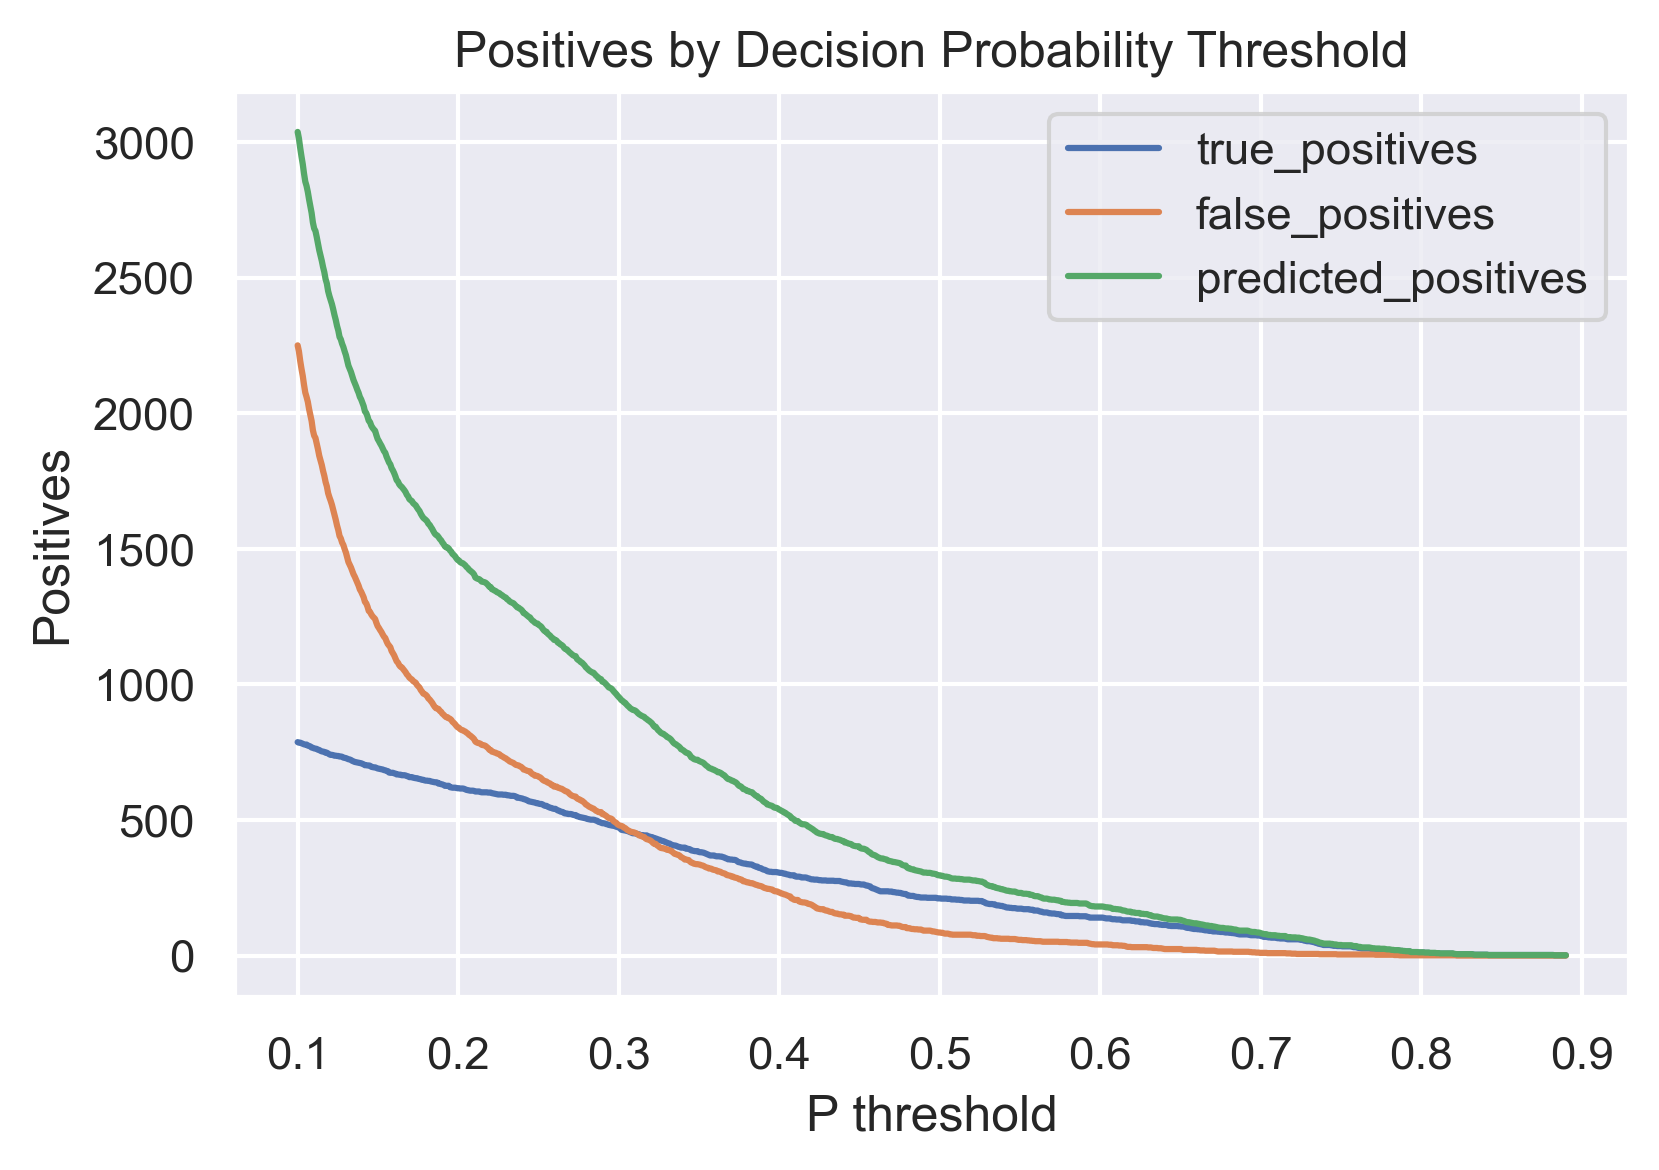

In [497]:
sns.set()

X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.89,1000)
model_val_probs = rf_random.predict_proba(X_val)[:,1] # positive class probs

true_positives,false_positives,predicted_positives=[],[],[]
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    true_positives.append(np.sum((y_val==1)&(model_val_probs>= p)))
    false_positives.append(np.sum((y_val == 0) & (model_val_probs >= p)))
    predicted_positives.append(np.sum(model_val_probs >= p))

    
plt.figure(dpi=300)    
plt.plot(thresh_ps, true_positives)
plt.plot(thresh_ps, false_positives)
plt.plot(thresh_ps, predicted_positives)


plt.title('Positives by Decision Probability Threshold')
plt.legend(['true_positives','false_positives','predicted_positives'])

plt.xlabel('P threshold')
plt.ylabel('Positives');

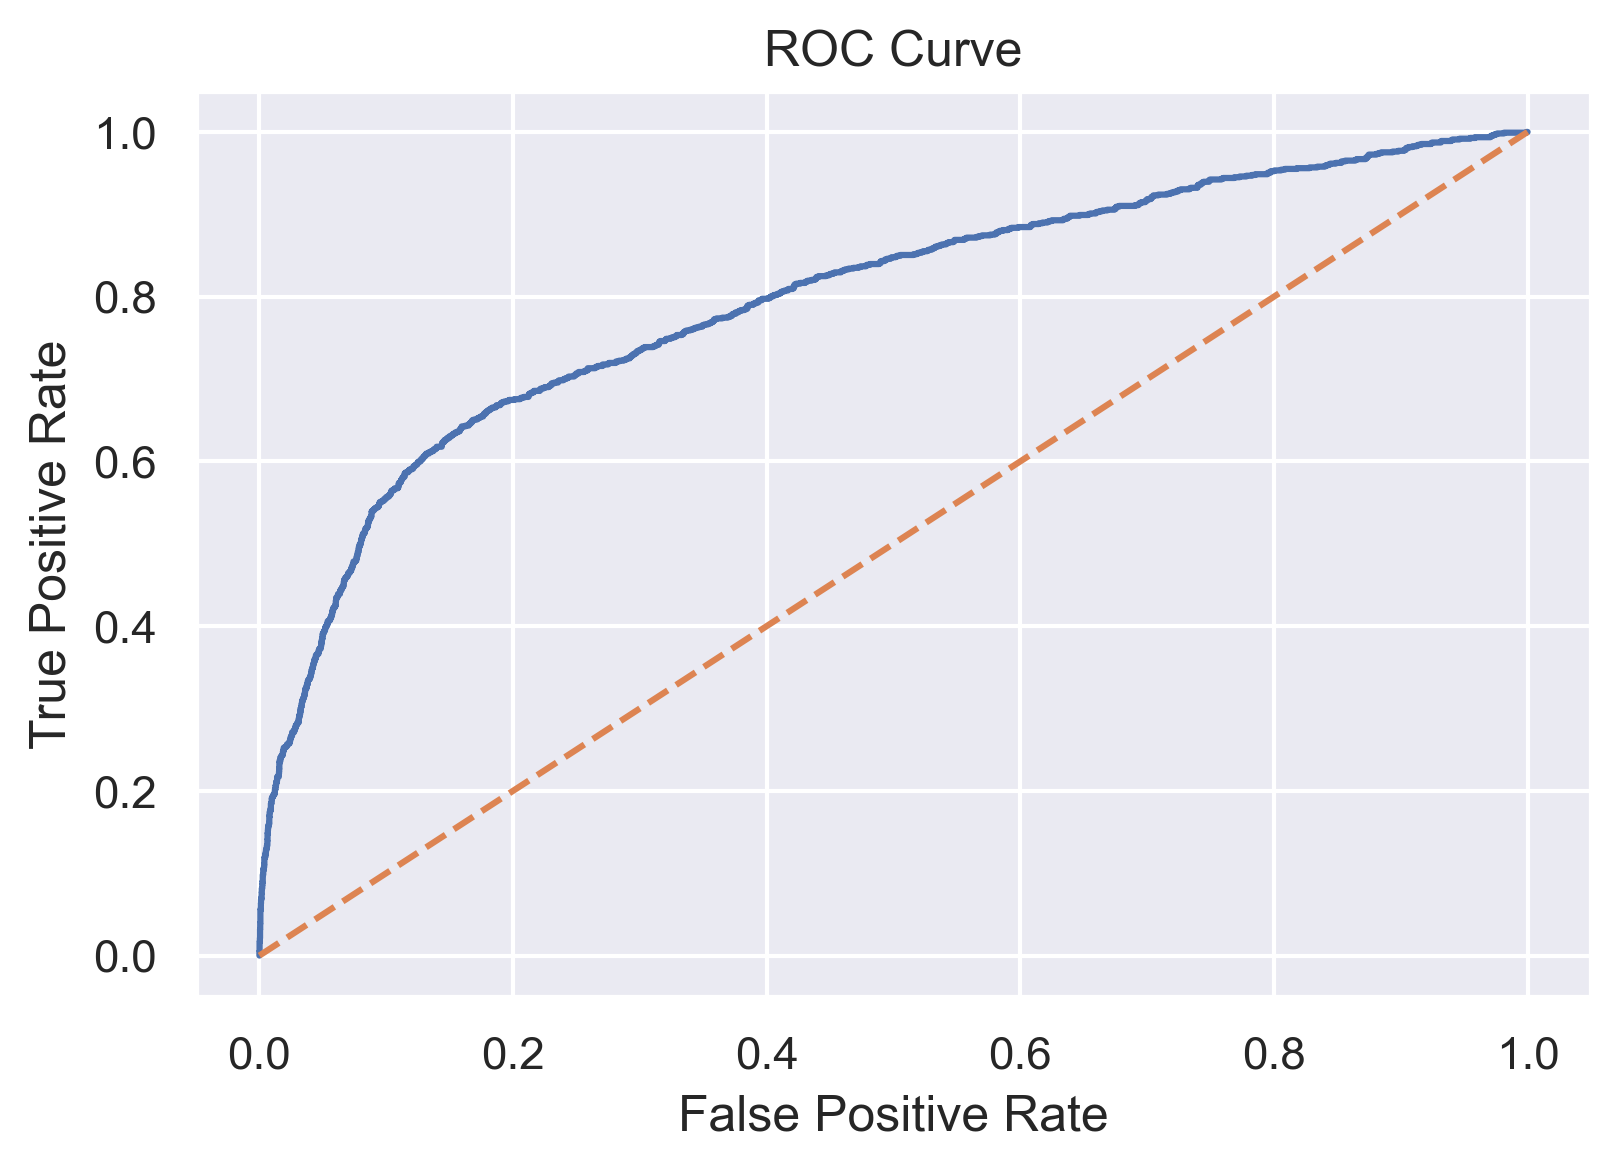

In [580]:
plt.figure(dpi=300)

fpr, tpr, _ = roc_curve(y_test, rf_random.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.savefig('ROC')

In [576]:
sns.set()

X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
model_val_probs = rf_random.predict_proba(X_val)[:,1] # positive class probs

true_positives,false_positives,predicted_positives=[],[],[]
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    true_positives.append(np.sum((y_val==1)&(model_val_probs>= p)))
    false_positives.append(np.sum((y_val == 0) & (model_val_probs >= p)))
    predicted_positives.append(np.sum(model_val_probs >= p))


# plt.figure(dpi=300)        
# plt.bar(thresh_ps,true_positives)
# plt.bar(thresh_ps,false_positives)
# plt.plot(thresh_ps, predicted_positives)


# plt.title('Prediction by threshold')
# plt.legend(['true_positives','false_positives'])

# plt.xlabel('P threshold')
# plt.ylabel('Positives')


In [528]:
thresh_ps

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [529]:
true_positives

[787, 617, 472, 306, 211, 140, 72, 11, 0]

In [530]:
false_positives

[2250, 841, 481, 233, 85, 41, 10, 1, 0]

  Team  Round 1  Round 2  Round 3  Round 4
0    A       10       20       10       26
1    B       20       25       15       21
2    C       12       15       19        6
3    D       10       18       11       19


<AxesSubplot:title={'center':'Stacked Bar Graph by dataframe'}, xlabel='Team'>

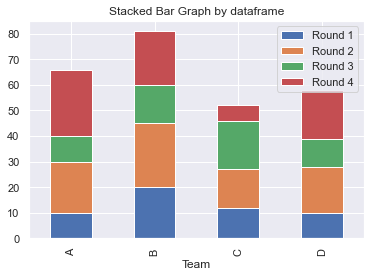

In [552]:
# create data
df = pd.DataFrame([['A', 10, 20, 10, 26], ['B', 20, 25, 15, 21], ['C', 12, 15, 19, 6],
                   ['D', 10, 18, 11, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])
# view data
print(df)
  
# plot data in stack manner of bar type
df.plot(x='Team', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')

In [550]:
p=np.array(thresh_ps).reshape((-1, 1))

In [551]:
true_=np.array(true_positives).reshape((-1, 1))
false_=np.array(false_positives).reshape((-1, 1))

In [557]:
array=np.concatenate((p, true_, false_),axis=1)
array

array([[   0.1,  787. , 2250. ],
       [   0.2,  617. ,  841. ],
       [   0.3,  472. ,  481. ],
       [   0.4,  306. ,  233. ],
       [   0.5,  211. ,   85. ],
       [   0.6,  140. ,   41. ],
       [   0.7,   72. ,   10. ],
       [   0.8,   11. ,    1. ],
       [   0.9,    0. ,    0. ]])

In [563]:
df_ = pd.DataFrame(array, columns = ['probablity_threshold','true_positives','false_positives'])
df_

,probablity_threshold,true_positives,false_positives
0,0.1,787.0,2250.0
1,0.2,617.0,841.0
2,0.3,472.0,481.0
3,0.4,306.0,233.0
4,0.5,211.0,85.0
5,0.6,140.0,41.0
6,0.7,72.0,10.0
7,0.8,11.0,1.0
8,0.9,0.0,0.0


<Figure size 1800x1200 with 0 Axes>

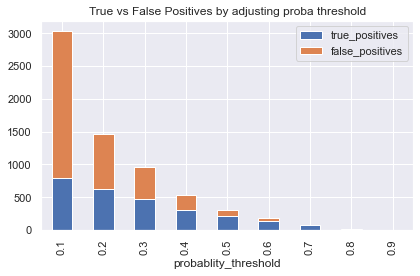

In [575]:
plt.figure(dpi=300)
df_.plot(x='probablity_threshold', kind='bar', stacked=True,
        title='True vs False Positives by adjusting proba threshold')
plt.tight_layout()
plt.savefig('true vs false',dpi=300)

In [585]:
# X_train.columns

In [584]:
# cols = ['age', 'job', 'marital', 'education', 'default', 'housing']
       

# n_rows = 2
# n_cols = 3

# # The subplot grid and the figure size of each graph
# # This returns a Figure (fig) and an Axes Object (axs)
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

# for r in range(0,n_rows):
#     for c in range(0,n_cols):  
        
#         i = r*n_cols+ c # index to go through the number of columns       
#         ax = axs[r][c]  # Show where to position each subplot
#         sns.countplot(df[cols[i]], hue=df["y"], ax=ax)
#         ax.set_title(f'success by {cols[i]}' )
#         ax.legend(title="success", loc='upper right') 
        
# plt.tight_layout()   

In [297]:
# importances = randomforest.feature_importances_
# feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
# forest_importances = pd.Series(importances, index=feature_names)
# std = np.std([tree.feature_importances_ for tree in randomforest.estimators_], axis=0)

# plt.figure(dpi=300)
# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

## Sampling Methods With Baseline RF

In [587]:
#over_sampling
import imblearn.over_sampling
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
print(n_neg/n_pos)

7.615531205335874


In [588]:
ratio = {1 : n_pos * 6, 0 : n_neg}

ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42)
X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train)

In [589]:
(np.sum(y_tr_rs == 0))/(np.sum(y_tr_rs == 1))

1.2692552008893123

In [598]:
randomforest.fit(X_tr_rs, y_tr_rs)
# print(f'accuracy score on trainin data: {randomforest.score(X_train, y_train):.4f}')
y_pred=randomforest.predict(X_test)
# print(f'accuracy score on test data: {randomforest.score(X_test, y_test):.4f}')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.55      0.29      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043



In [600]:
# SMOTE oversampling for positives
ratio = {1 : n_pos * 6, 0 : n_neg}

smt = imblearn.over_sampling.SMOTE(
                   sampling_strategy = ratio,
                   random_state=42)
X_tr_, y_tr_ = smt.fit_resample(X_train, y_train)

randomforest.fit(X_tr_, y_tr_)
# print(f'accuracy score on trainin data: {randomforest.score(X_train, y_train):.4f}')
y_pred=randomforest.predict(X_test)
# print(f'accuracy score on test data: {randomforest.score(X_test, y_test):.4f}')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7952
           1       0.40      0.43      0.42      1091

    accuracy                           0.85      9043
   macro avg       0.66      0.67      0.67      9043
weighted avg       0.86      0.85      0.86      9043



In [601]:
#Undersampling 
import imblearn.under_sampling
# specify desired data split
ratio = {1: 50 , 0 : 50}
# randomly undersample negative samples:
RUS =imblearn.under_sampling.RandomUnderSampler(sampling_strategy = ratio,random_state=42)
X_tr__, y_tr__ = RUS.fit_resample(X_train, y_train)

randomforest.fit(X_tr__, y_tr__ )
# print(f'accuracy score on trainin data: {randomforest.score(X_train, y_train):.4f}')
y_pred=randomforest.predict(X_test)
# print(f'accuracy score on test data: {randomforest.score(X_test, y_test):.4f}')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      7952
           1       0.21      0.56      0.30      1091

    accuracy                           0.69      9043
   macro avg       0.56      0.63      0.55      9043
weighted avg       0.84      0.69      0.74      9043



## Class Weights

In [604]:
forest_balanced=RandomForestClassifier(class_weight='balanced',random_state=42)

forest_balanced.fit(X_train, y_train)
y_pred=forest_balanced.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.72      0.19      0.31      1091

    accuracy                           0.89      9043
   macro avg       0.81      0.59      0.62      9043
weighted avg       0.88      0.89      0.87      9043



In [605]:
forest_4x = RandomForestClassifier(class_weight= {1 : 4, 0 : 1},random_state=42)
forest_4x.fit(X_train, y_train)
y_pred=forest_4x.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.69      0.19      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.80      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



In [606]:
forest_6x = RandomForestClassifier(class_weight= {1 : 6, 0 : 1},random_state=42)
forest_6x.fit(X_train, y_train)
y_pred=forest_6x.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.69      0.19      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



In [310]:
confusion_matrix(y_test, y_pred)

array([[7850,  102],
       [ 894,  197]])

In [427]:
# df[df['y']==y_test]

In [428]:
from sklearn.ensemble import AdaBoostClassifier

In [430]:
adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5))
adaBoost.fit(X_train, y_train)
y_pred=adaBoost.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93      7952
           1       0.52      0.27      0.36      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.62      0.65      9043
weighted avg       0.86      0.88      0.87      9043



In [431]:
adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
adaBoost.fit(X_train, y_train)
y_pred=adaBoost.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7952
           1       0.67      0.15      0.24      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.57      0.59      9043
weighted avg       0.87      0.89      0.86      9043

